In [11]:
# plot the losses of different NN models 
# http://nbviewer.jupyter.org/github/fchollet/deep-learning-with-python-notebooks/blob/master/4.4-overfitting-and-underfitting.ipynb



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

seed = 1000

Using TensorFlow backend.
/Users/yennanliu/anaconda3/envs/ds_dash/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [2]:
# get tge data

iris = datasets.load_iris()
x = iris.data
y = to_categorical(iris.target)
labels_names = iris.target_names
xid, yid = 0, 1

le = LabelEncoder()
encoded_labels = le.fit_transform(iris.target_names)

In [3]:
# train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=seed)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.8, random_state=seed)

/Users/yennanliu/anaconda3/envs/ds_dash/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [4]:
# train data set 
model = Sequential()
model.add(Dense(8,activation='relu',input_shape = (4,)))
model.add(Dense(3,activation='softmax'))
model.compile(optimizer = 'rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model1_history = model.fit(x_train, 
                    y_train,
                    epochs = 200,
                    batch_size = 16,
                    verbose=0,
                    validation_data=(x_val,y_val))

In [5]:
# bulid the model 

model2 = Sequential()
model2.add(Dense(8,activation='relu',input_shape = (4,)))
model2.add(Dense(3,activation='softmax'))
model2.add(Dense(3,activation='softmax'))
model2.compile(optimizer = 'rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model2_history = model2.fit(x_train, 
                    y_train,
                    epochs = 200,
                    batch_size = 16,
                    verbose=0,
                    validation_data=(x_val,y_val))

In [6]:
model1_history

In [7]:
# plot loss (during training)
# ref  : http://nbviewer.jupyter.org/github/fchollet/deep-learning-with-python-notebooks/blob/master/4.4-overfitting-and-underfitting.ipynb


model1_val_loss = model1_history.history['val_loss']
model2_val_loss= model2_history.history['val_loss']

epochs = range(1, len(model1_val_loss)+1)

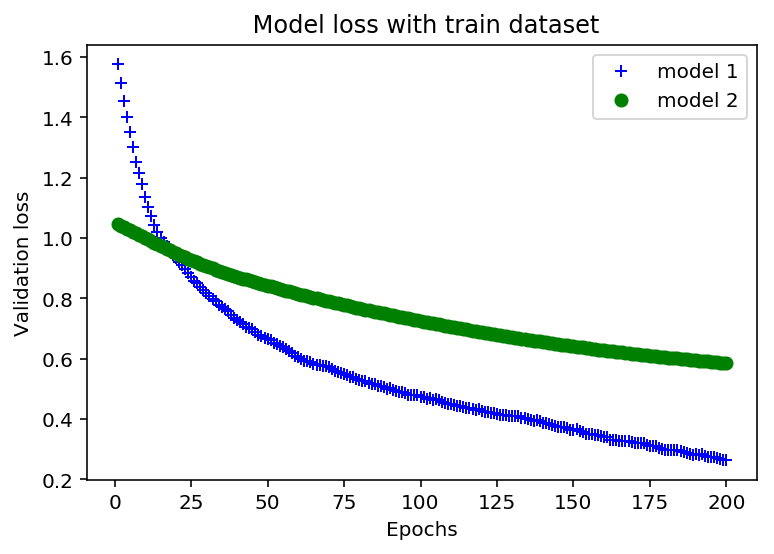

In [8]:
import matplotlib.pyplot as plt

# b+ is for "blue cross"
plt.plot(epochs, model1_val_loss, 'b+', label='model 1')
# "bo" is for "blue dot"
plt.plot(epochs, model2_val_loss, 'go', label='model 2')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.title(' Model loss with train dataset')
plt.legend()

plt.show()

In [9]:
# test dataset 


# train data set 
model = Sequential()
model.add(Dense(8,activation='relu',input_shape = (4,)))
model.add(Dense(3,activation='softmax'))
model.compile(optimizer = 'rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_history = model.fit(x_test, 
                    y_test,
                    epochs = 200,
                    batch_size = 16,
                    verbose=0,
                    validation_data=(x_val,y_val))


model2 = Sequential()
model2.add(Dense(8,activation='relu',input_shape = (4,)))
model2.add(Dense(3,activation='softmax'))
model2.add(Dense(3,activation='softmax'))
model2.compile(optimizer = 'rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model2_history = model2.fit(x_test, 
                    y_test,
                    epochs = 200,
                    batch_size = 16,
                    verbose=0,
                    validation_data=(x_val,y_val))


# plot loss (during training)
# ref  : http://nbviewer.jupyter.org/github/fchollet/deep-learning-with-python-notebooks/blob/master/4.4-overfitting-and-underfitting.ipynb


model1_val_loss = model_history.history['val_loss']
model2_val_loss= model2_history.history['val_loss']
epochs = range(1, len(model1_val_loss)+1)



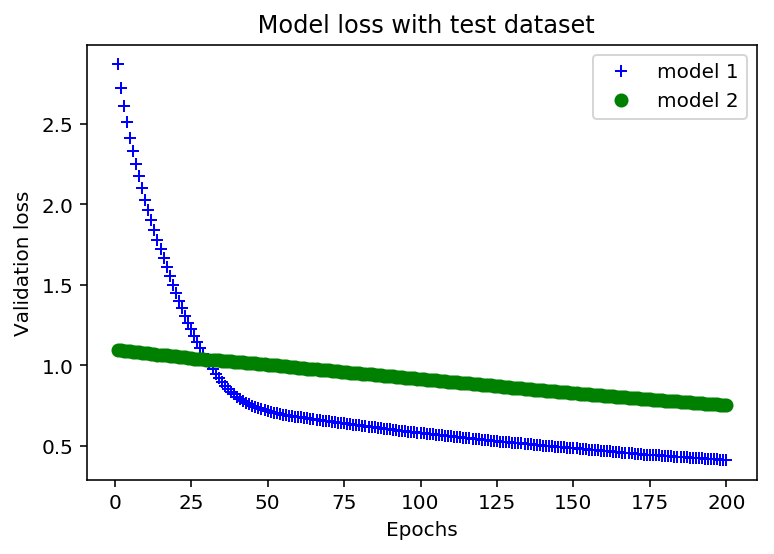

In [10]:
import matplotlib.pyplot as plt

# b+ is for "blue cross"
plt.plot(epochs, model1_val_loss, 'b+', label='model 1')
# "bo" is for "blue dot"
plt.plot(epochs, model2_val_loss, 'go', label='model 2')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.title(' Model loss with test dataset')
plt.legend()

plt.show()